<a href="https://colab.research.google.com/github/amulyakamatagi/python-moments-of-business/blob/main/Waist_circumference(transformations).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BUSINESS PROBLEM**
Develop a regression model with high accuracy and explain the relation between the waist circumference and Adipose Tissue

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [119]:
data=pd.read_csv("WC_AT.csv")
data

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [120]:
data.shape

(109, 2)

In [121]:
data.columns

Index(['Waist', 'AT'], dtype='object')

In [122]:
data.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [124]:
data[data.duplicated()].shape

(0, 2)

# BOXPLOTS & HEATMAP OF NULL VALUES

<Axes: >

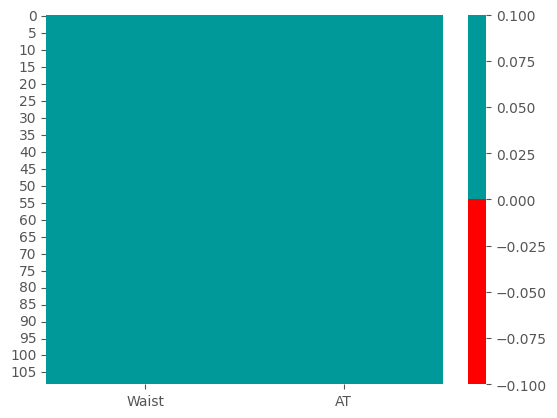

In [125]:
cols=data.columns
colour=["#ff0000","#009999"]
sns.heatmap(data[cols].isnull(),cmap=sns.color_palette(colour))

Text(0.5, 1.0, 'AT')

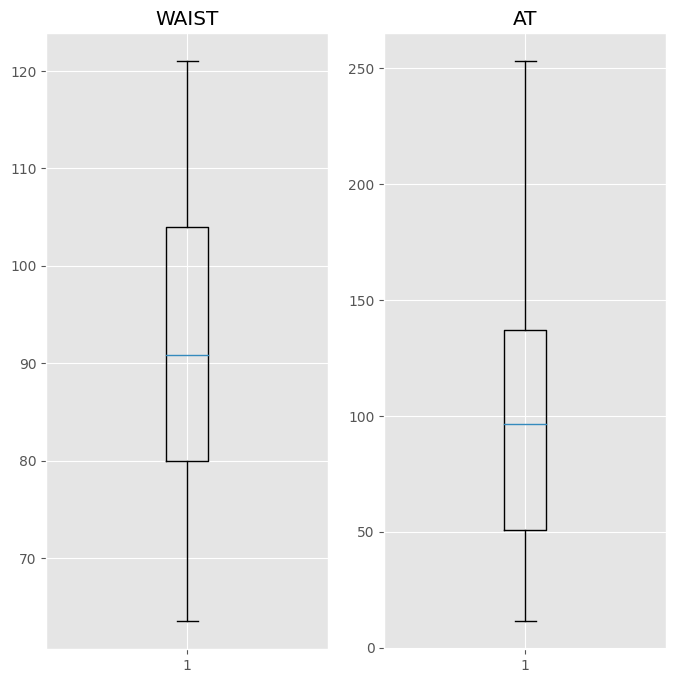

In [126]:
plt.figure(figsize=(8,8))
plt.subplot(121)
plt.boxplot(data["Waist"])
plt.title("WAIST")
plt.subplot(122)
plt.boxplot(data["AT"])
plt.title("AT")

# **INTERPRETATION :**
* The mean > median slightly indicating that the data is slightly skewed making it positively skewed data


Text(0.5, 1.0, 'WAIST CIRCUMFERENCE')

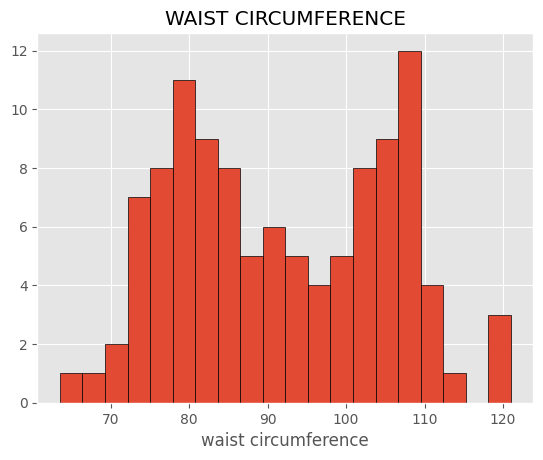

In [127]:
plt.hist(data["Waist"],bins=20,edgecolor="black")
plt.xlabel("waist circumference")
plt.title("WAIST CIRCUMFERENCE")

Text(0.5, 1.0, 'ADIPOSE TISSUE')

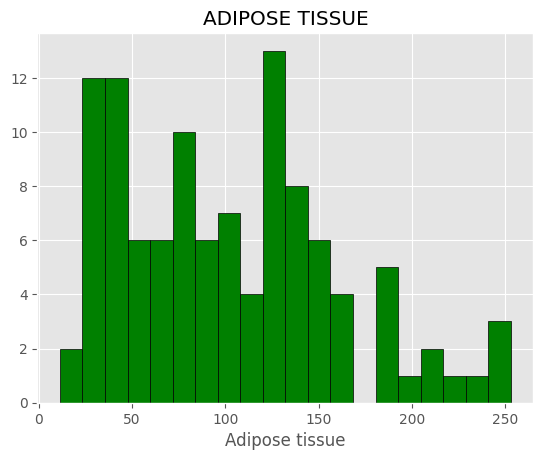

In [128]:
plt.hist(data["AT"],bins=20,edgecolor="black",facecolor="green")
plt.xlabel("Adipose tissue")
plt.title("ADIPOSE TISSUE")

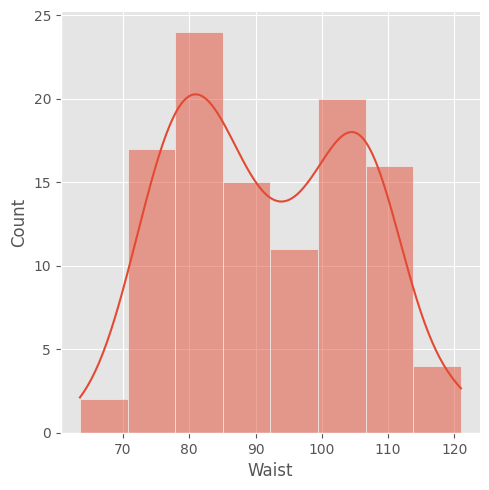

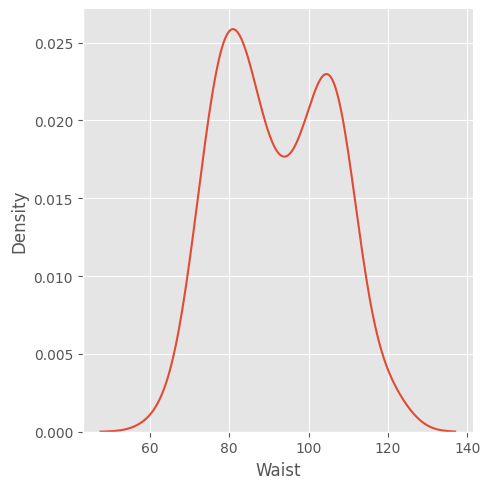

In [129]:
plt.style.use("ggplot")
sns.displot(data,x="Waist",kde=True)
sns.displot(data,x="Waist",kind="kde")

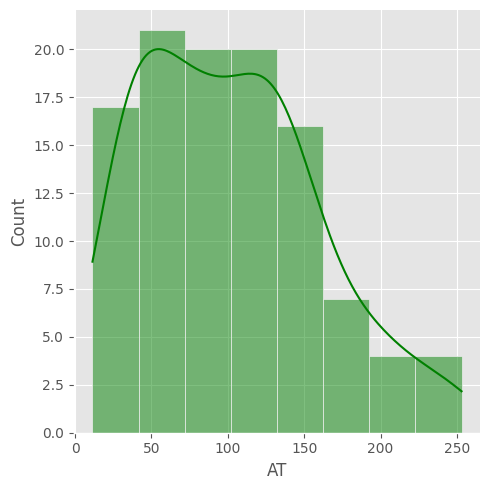

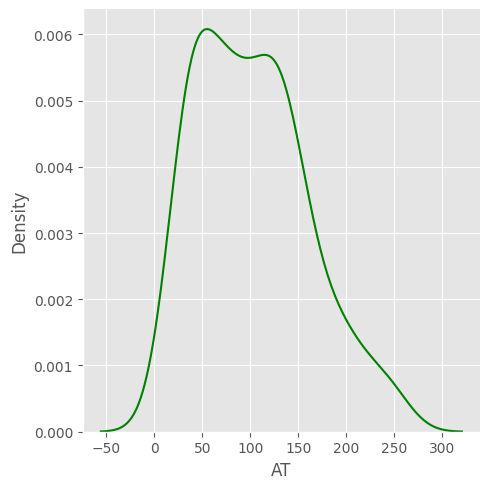

In [130]:
plt.style.use("ggplot")
sns.displot(data,x="AT",kde=True,color="green")
sns.displot(data,x="AT",kind="kde",color="green")

# **INTERPRETATION:**
* most of the data in the waist column lies in the range of 80 and 104
* while 50 % of the data in the Adipose Tissue column lies in the range of 50 to 170

# **CORRELATION** (Strength between two variables)
* X(predictor)=Waist circumference
* Y(Target variable)=Adipose Tissue



<Axes: >

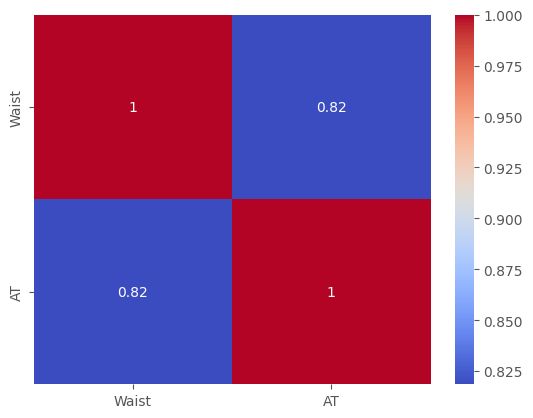

In [131]:
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

* There is a very strong positive correlation between two variables

# **SCATTERPLOT**

Text(0.5, 1.0, 'SCATTERPLOT')

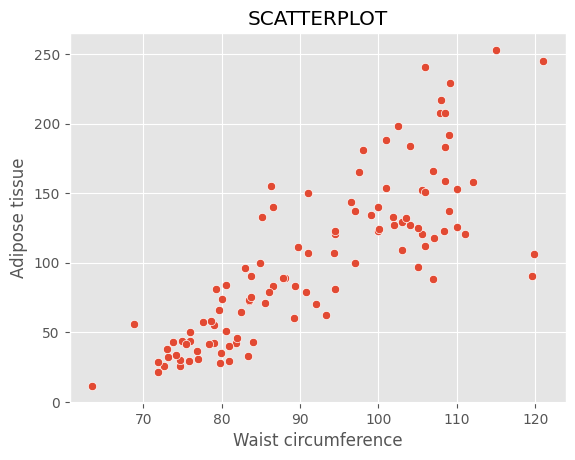

In [132]:
sns.scatterplot(x="Waist",y="AT",data=data)
plt.xlabel("Waist circumference")
plt.ylabel("Adipose tissue")
plt.title("SCATTERPLOT")

* There is a positive linear association between two variables
* this indicates that , as the waist circumference increases , adipose tissue size also increases leading to cardio Vascular diseases

# **REGPLOT**(the line of best fit)

Text(0, 0.5, 'Adipose tissue')

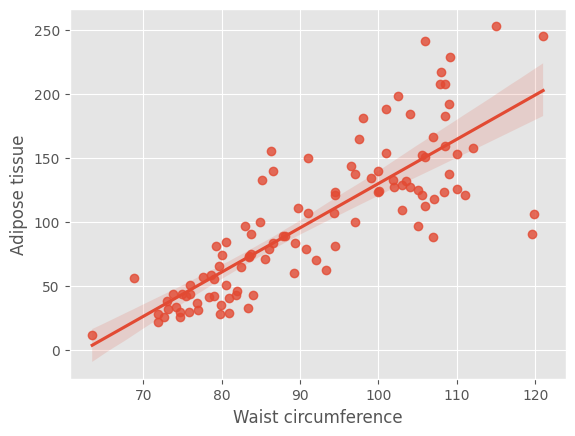

In [133]:
sns.regplot(x="Waist",y="AT",data=data)
plt.xlabel("Waist circumference")
plt.ylabel("Adipose tissue")

* This indicates that there is a good correlation between teo variables

# **LINEAR MODEL BUILDING**

In [134]:
import statsmodels.formula.api as smf
model=smf.ols("AT~Waist",data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           1.62e-27
Time:                        16:53:04   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
model.rsquared

0.670036893052843

In [136]:
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [137]:
pred=model.predict(data["Waist"])
pred

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
          ...    
104    130.250337
105    106.730093
106    136.130398
107    157.229440
108    159.304756
Length: 109, dtype: float64

In [138]:
model.resid

0     -16.848252
1      -9.241704
2     -24.353210
3     -31.589758
4     -12.382366
         ...    
104    -6.250337
105   -44.530093
106    -3.130398
107    50.770560
108    48.695244
Length: 109, dtype: float64

In [139]:
rmse=np.sqrt(np.mean((np.array(data["AT"])-np.array(pred))**2))
rmse

32.760177495755144

Text(0, 0.5, 'Adipose tissue')

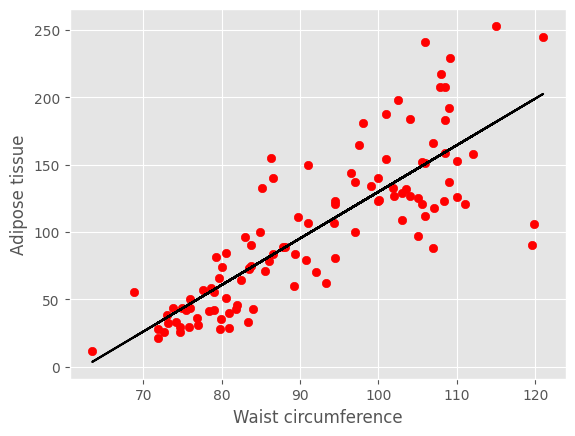

In [140]:
plt.scatter(x="Waist",y="AT",data=data,color="red")
plt.plot(data["Waist"],pred,color="black")
plt.xlabel("Waist circumference")
plt.ylabel("Adipose tissue")

# **OBSERVATION :**
* The R-squared value = 67 % which is not accurate enough
* the Root mean squared value (RMSE)= 32.76
* the interpretation we get from the above linear model is the it  can be trained in a better way and get more accurate R-squared value  

# **LOG TRANSFORMATION**
* Adding Logarithm to the predictor

In [141]:
model2=smf.ols("AT~np.log(Waist)",data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           6.80e-28
Time:                        16:53:05   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
model2.params

Intercept       -1328.341989
np.log(Waist)     317.135564
dtype: float64

In [143]:
model2.rsquared

0.6753193874202299

In [144]:
pred2=model2.predict(pd.DataFrame(data["Waist"]))
pred2

0       39.828156
1       30.572779
2       68.410960
3       76.638769
4       39.403610
          ...    
104    132.438233
105    110.127880
106    137.778929
107    156.234559
108    157.993171
Length: 109, dtype: float64

In [145]:
model2.resid #(actual value-predicted value)

0     -14.108156
1      -4.682779
2     -25.810960
3     -33.838769
4      -9.563610
         ...    
104    -8.438233
105   -47.927880
106    -4.778929
107    51.765441
108    50.006829
Length: 109, dtype: float64

In [146]:
rmse_log=np.sqrt(np.mean((np.array(data["AT"])-np.array(pred2))**2))
rmse_log

32.49688490932126

Text(0, 0.5, 'Adipose tissue')

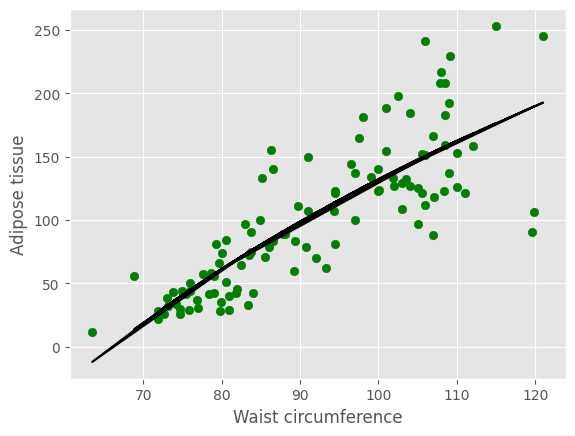

In [147]:
plt.scatter(x="Waist",y="AT",data=data,color="green")
plt.plot(data["Waist"],pred2,color="black")
plt.xlabel("Waist circumference")
plt.ylabel("Adipose tissue")

# **COMPARISION OF TWO HISTOGRAMS**

<ipython-input-148-c1150a07d202>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Waist"],bins=10,kde=True)


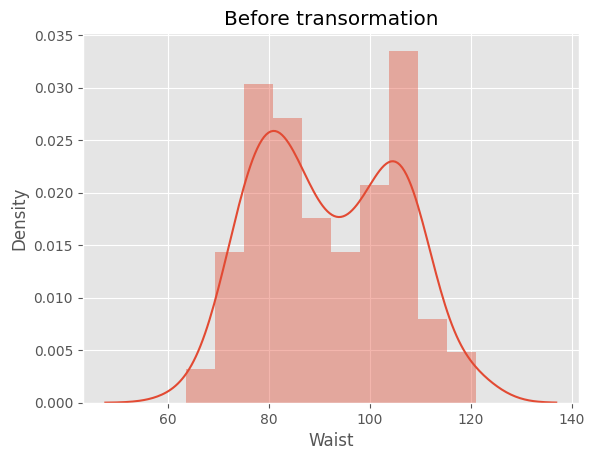

In [148]:
sns.distplot(data["Waist"],bins=10,kde=True)
plt.title("Before transormation")
plt.show()


<ipython-input-149-63bf41cc3f73>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data["Waist"]),bins=10,kde=True)


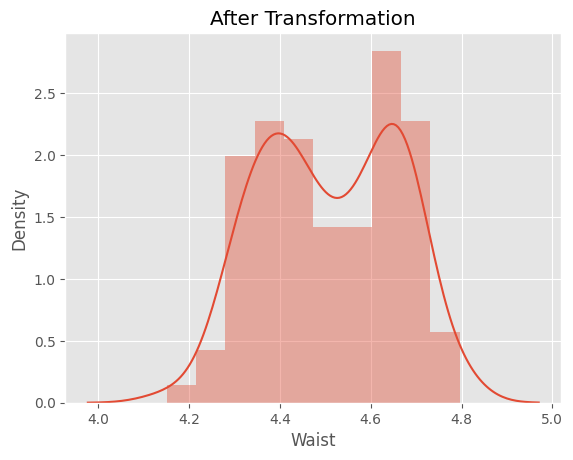

In [149]:
sns.distplot(np.log(data["Waist"]),bins=10,kde=True)
plt.title("After Transformation")
plt.show()

# **INTERPRETATION**
* from the above logarithm , we can infer that the R-squared value has improved to 1% while RMSE value has gone comparitively down
* however the model can be trained further well

# **EXPONENTIAL TRANSFORMATION**
* Applying Logarithm on Target Variable

In [150]:
model3=smf.ols("np.log(AT)~Waist",data=data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           2.68e-30
Time:                        16:53:06   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
model3.rsquared

0.7071139664198057

In [152]:
pred_expo=model3.predict(pd.DataFrame(data["Waist"]))
pred3=np.exp(pred_expo)
pred3

0       42.516361
1       38.991601
2       56.467684
3       61.572246
4       42.345566
          ...    
104    117.953181
105     89.709020
106    126.307181
107    161.459872
108    165.406833
Length: 109, dtype: float64

In [153]:
rmse_expo=np.sqrt(np.mean((np.array(data["AT"])-np.array(pred3))**2))
rmse_expo

38.52900175807143

Text(0, 0.5, 'Adipose tissue')

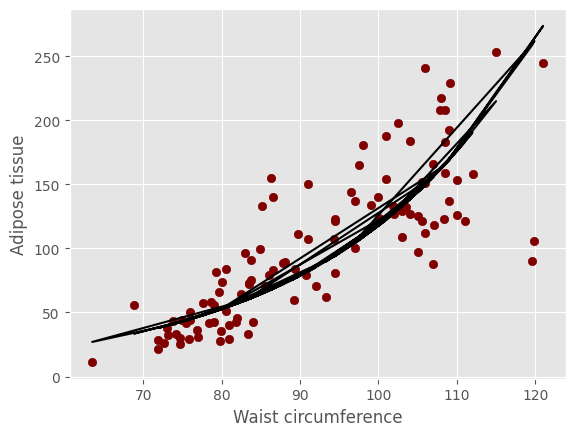

In [154]:
plt.scatter(x="Waist",y="AT",data=data,color="maroon")
plt.plot(data["Waist"],pred3,color="black")
plt.xlabel("Waist circumference")
plt.ylabel("Adipose tissue")

<ipython-input-155-387687d478f4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data["AT"]),bins=10,kde=True)
<ipython-input-155-387687d478f4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data["Waist"]),bins=10,kde=True)


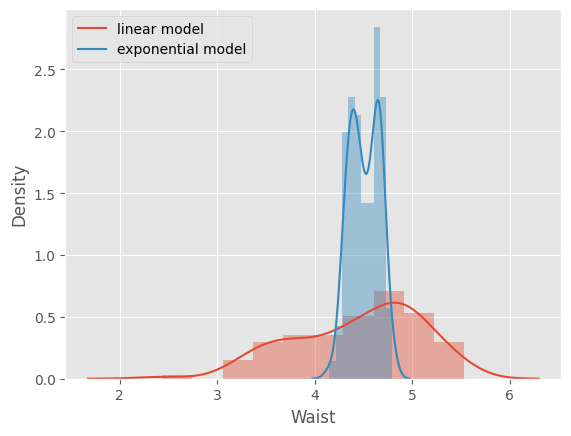

In [155]:
labels=["linear model","exponential model"]
sns.distplot(np.log(data["AT"]),bins=10,kde=True)
sns.distplot(np.log(data["Waist"]),bins=10,kde=True)
plt.legend(labels)
plt.show()

# INTERPRETATION:
* As we can see how exponential transformation is different from log transformation
* Although the Accuracy of the exponential model has comparitively higher (70 %) the RMSE value also has come up comparitively
* this gives the room to Quadratic transformation

# **QUADRATIC TRANSFORMATION**

In [156]:
# creating and adding  a new column to the data set

In [158]:
data["Waist_sq"]=data["Waist"]*data["Waist"]
data

,Waist,AT,Waist_sq
0,74.75,25.72,5587.5625
1,72.60,25.89,5270.7600
2,81.80,42.60,6691.2400
3,83.95,42.80,7047.6025
4,74.65,29.84,5572.6225
...,...,...,...
104,100.10,124.00,10020.0100
105,93.30,62.20,8704.8900
106,101.80,133.00,10363.2400
107,107.90,208.00,11642.4100


In [160]:
model_quad=smf.ols("np.log(AT)~Waist+Waist_sq",data=data).fit()
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           1.80e-35
Time:                        17:01:38   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist          0.2289      0.032      7.107      0.000       0.165       0.293
Waist_sq      -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [161]:
model_quad.rsquared

0.7789817667713608

In [162]:
model_quad.params

Intercept   -7.824071
Waist        0.228864
Waist_sq    -0.001016
dtype: float64

In [165]:
pred_quad=model_quad.predict(data)
pred4=np.exp(pred_quad)
pred4

0       36.779400
1       31.026570
2       60.145769
3       68.488132
4       36.497176
          ...    
104    134.555999
105    108.012957
106    140.081911
107    154.205675
108    155.034904
Length: 109, dtype: float64

In [167]:
rmse_quad=np.sqrt(np.mean((np.array(data["AT"])-np.array(pred4))**2))
rmse_quad

32.24444782776221

Text(0, 0.5, 'Adipose tissue')

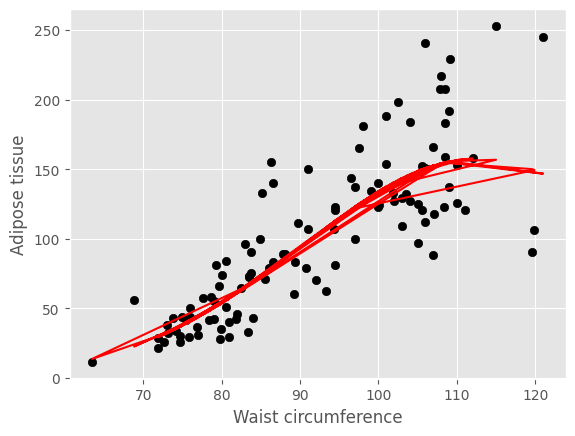

In [168]:
plt.scatter(x="Waist",y="AT",data=data,color="black")
plt.plot(data["Waist"],pred4,color="red")
plt.xlabel("Waist circumference")
plt.ylabel("Adipose tissue")

In [171]:
data={"MODEL":pd.Series(["rmse_linear","rmse_log","rmse_exp","rmse_quad"]),
      "RMSE_VALUES":pd.Series([rmse,rmse_log,rmse_expo,rmse_quad]),
      "R_SQUARED":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared])}

In [173]:
tabel=pd.DataFrame(data)
tabel

,MODEL,RMSE_VALUES,R_SQUARED
0,rmse_linear,32.760177,0.670037
1,rmse_log,32.496885,0.675319
2,rmse_exp,38.529002,0.707114
3,rmse_quad,32.244448,0.778982


# **MODEL VALIDATION TECHNIQUE**

(array([ 5.,  5., 16., 19., 27., 15., 14.,  5.,  2.,  1.]),
 array([-2.26761195, -1.74678239, -1.22595282, -0.70512326, -0.1842937 ,
         0.33653586,  0.85736542,  1.37819499,  1.89902455,  2.41985411,
         2.94068367]),
 <BarContainer object of 10 artists>)

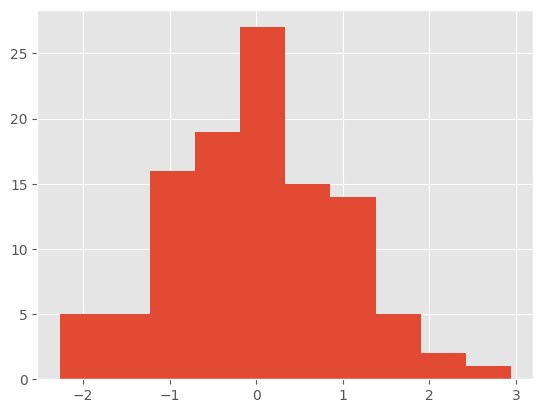

In [175]:
plt.hist(model_quad.resid_pearson)

Text(0, 0.5, 'standardized residual')

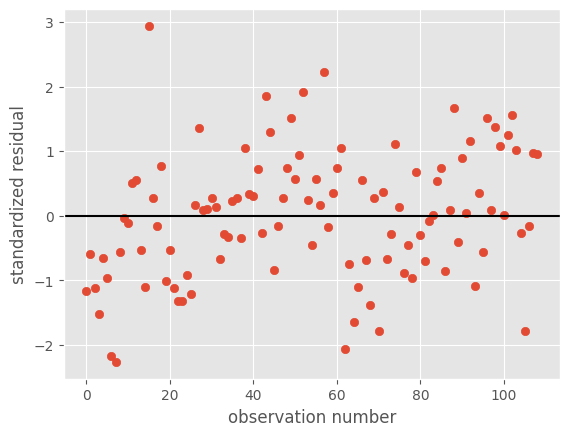

In [180]:
plt.scatter(np.arange(109),model_quad.resid_pearson)
plt.axhline(y=0,color="black")
plt.xlabel("observation number")
plt.ylabel("standardized residual")

# **INTERPRETATION:**
* constant Variance and mean =0 indicates that the quadratic transformation model is the best model